## Basic Libraries

In [1]:
import numpy as np
import pandas as pd

#visualization

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep Learning Libraries

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

## Train and Test Dataset

In [5]:
'''fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")'''

fashion_train_chunks = pd.read_csv(
    "fashion-mnist_train.csv",
    chunksize=10000)

fashion_train = pd.concat(
    fashion_train_chunks,
    ignore_index=True)

fashion_test_chunks = pd.read_csv(
    "fashion-mnist_test.csv",
    chunksize=10000)

fashion_test = pd.concat(
    fashion_test_chunks,
    ignore_index=True)


## Input preprocessing

In [7]:
fashion_train.shape

(60000, 785)

In [8]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
X_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

## Visualizing the digits

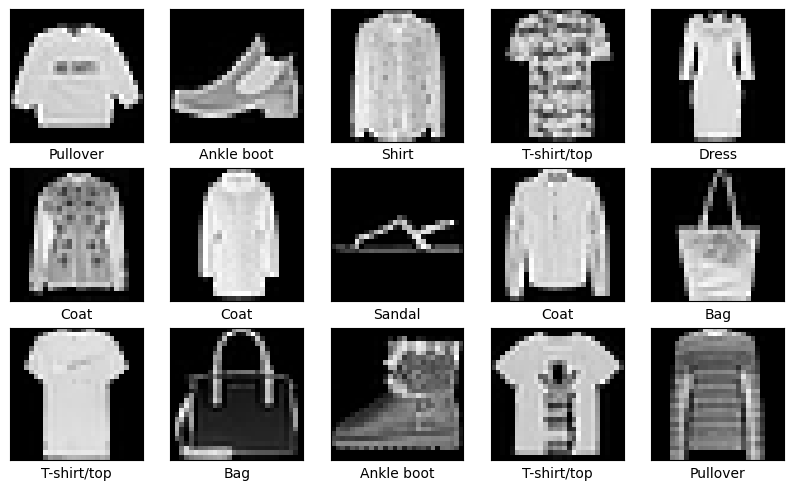

In [9]:
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
y_test_reshape=X_test_fashion.values.reshape(-1,28,28)

col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range (15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

## Encoding Fashion mnist label

In [10]:
y_train_fashion=to_categorical(y_train_fashion, num_classes=10)
y_test_fashion=to_categorical(y_test_fashion, num_classes=10)

## Creating base neural network

In [12]:
model = Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(24, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(24, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(10, activation="softmax") 
])

C:\Users\kavvi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

## Compiling the model

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(
    X_train_fashion,
    y_train_fashion,
    batch_size=100,
    epochs=10,
    validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8376 - loss: 0.4917 - val_accuracy: 0.8753 - val_loss: 0.3688
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8371 - loss: 0.4944 - val_accuracy: 0.8797 - val_loss: 0.3578
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8358 - loss: 0.4945 - val_accuracy: 0.8725 - val_loss: 0.3619
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8372 - loss: 0.4913 - val_accuracy: 0.8759 - val_loss: 0.3578
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8358 - loss: 0.4966 - val_accuracy: 0.8697 - val_loss: 0.3640
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8368 - loss: 0.4909 - val_accuracy: 0.8724 - val_loss: 0.3623
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8371 - loss: 0.4913 - val_accuracy: 0.8752 - val_loss: 0.3638
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8357 - loss: 0.4985 - val_accuracy: 0.

In [18]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3604    


In [19]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.875


## Predicting the label Fashion

In [20]:
y_predict_fashion=model.predict(X_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [21]:
y_predict_fashion=np.argmax(y_predict_fashion,axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)

## Confusion matrix for MNIST Fashion

<function matplotlib.pyplot.show(close=None, block=None)>

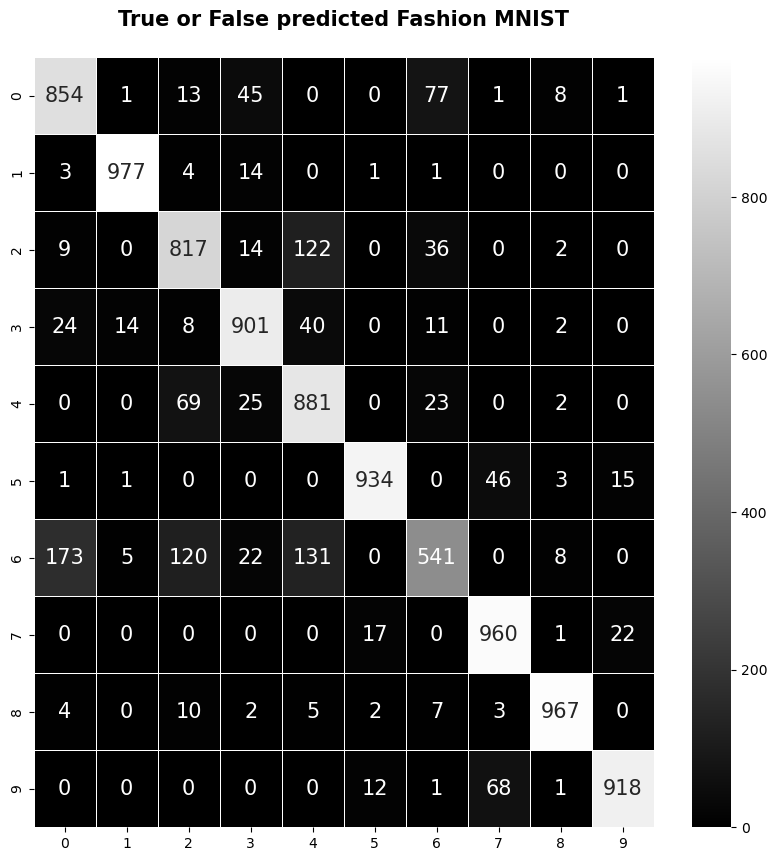

In [22]:
con_mat = confusion_matrix(y_test_fashion_eval,y_predict_fashion)
plt.style.use("seaborn-v0_8-deep")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='grey')
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show

## Classification report

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion_eval,y_predict_fashion))
print(history.history.keys())

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.75      0.88      0.81      1000
           5       0.97      0.93      0.95      1000
           6       0.78      0.54      0.64      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Summarize history for accuracy

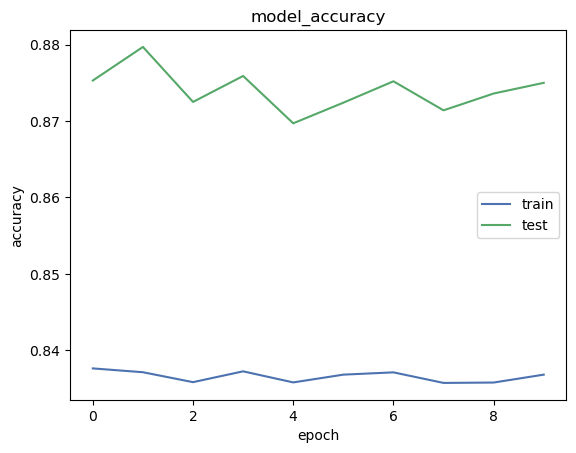

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

## Summarize history of loss

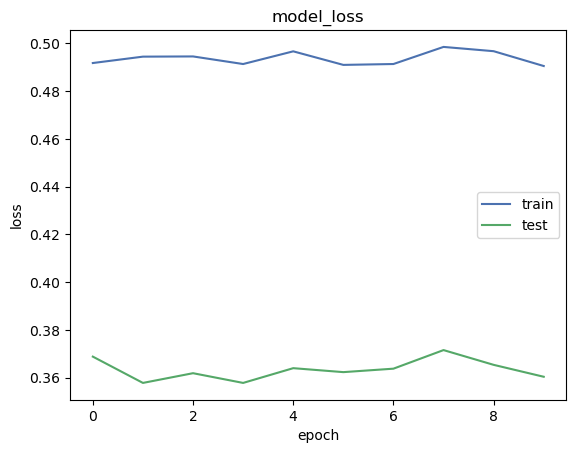

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

## tf expand_dims(x_test_digit[0])

In [26]:
y_predict=model.predict(X_test_fashion.loc[[0],:].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [27]:
y_predict=np.argmax(y_predict,axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)

## Name the number in the dataset in order

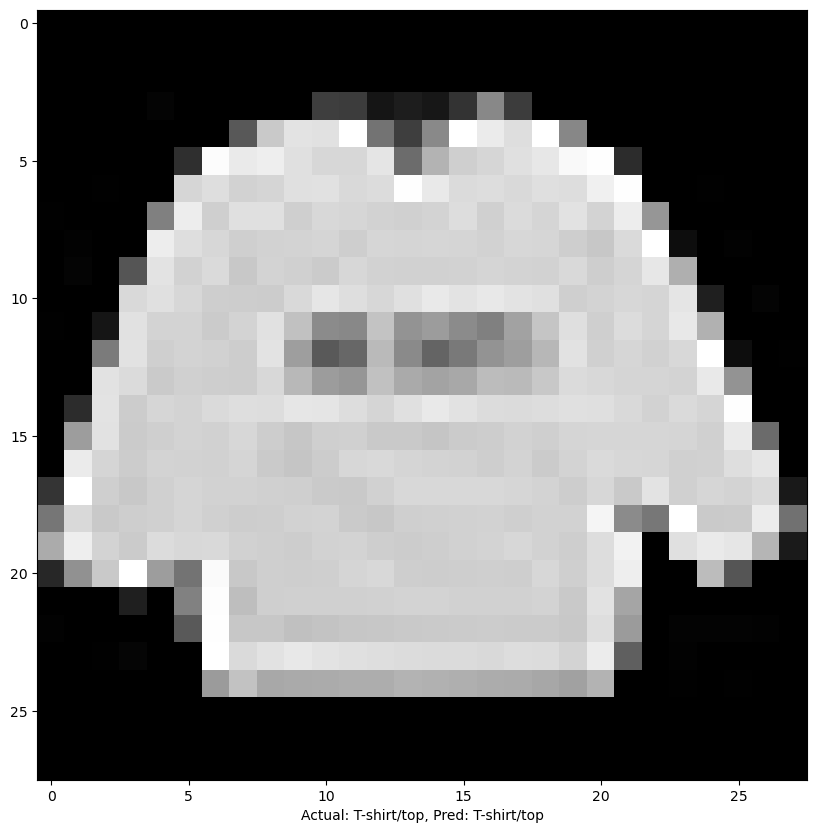

In [34]:
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10, 10))
plt.imshow(x_train_reshape[0], cmap="gray")

plt.xlabel(
    "Actual: {}, Pred: {}".format(
        col_names[np.argmax(y_test_fashion[0])],
        col_names[(y_predict[0])]
    )
)

plt.show()